In [2]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Model Implementation

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Importing Dataset

In [4]:
dataset=pd.read_csv("heart_data.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [5]:
dataset.shape

(303, 14)

In [6]:
x.shape

(303, 13)

In [7]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [8]:
y.shape

(303,)

## Splitting Training Data and Testing Data

In [9]:
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [10]:
X_train.shape

(242, 13)

In [11]:
Y_train.shape

(242,)

## Modelling

In [12]:
Models=[]
Accuracy=[]
KF=[]
def save_accuracy(model, accuracy, kf_min, kf_max):
    Models.append(model)
    Accuracy.append(accuracy)
    kf_min=round(kf_min,2)
    kf_max=round(kf_max,2)
    KF.append(str(kf_min)+" - "+str(kf_max))

In [13]:
Models.clear()
Accuracy.clear()
KF.clear()

## SVM

In [14]:
svm_model=svm.SVC(kernel="linear")
svm_model.fit(X_train, Y_train)
svm_pred=svm_model.predict(X_test)
accuracy_svm=round(accuracy_score(svm_pred, Y_test)*100,2)
print("Accuracy of SVM is: "+str(accuracy_svm))

Accuracy of SVM is: 86.89


In [15]:
svm_kf = cross_val_score(estimator = svm_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Kernel SVM", accuracy_svm, svm_kf.min()*100, svm_kf.max()*100)


## Logistic Regression

In [16]:
LR_classifier= LogisticRegression(fit_intercept= False, n_jobs= 1)      #Model Trainging
LR_classifier.fit(X_train, Y_train)
lr_pred=LR_classifier.predict(X_test)
accuracy_lr=round(accuracy_score(Y_test,lr_pred)*100,2)
print("Accuracy of LR is: "+str(accuracy_lr))

Accuracy of LR is: 88.52


C:\Users\omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
lr_kf = cross_val_score(estimator = LR_classifier, X = X_train, y = Y_train, cv = 10)
print(lr_kf)
save_accuracy("Logistic Regression", accuracy_lr, lr_kf.min()*100, lr_kf.max()*100)

NameError: name 'cross_val_score' is not defined

## Naive Bayes

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_pred=nb_model.predict(X_test)
accuracy_nb=round(accuracy_score(Y_test,nb_pred)*100,2)
print("Accuracy of Naive Bayes is: "+str(accuracy_nb))

Accuracy of Naive Bayes is: 80.33


In [19]:
nb_kf = cross_val_score(estimator = nb_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Naive Bayes", accuracy_nb, nb_kf.min()*100, nb_kf.max()*100)
print(nb_kf)

[0.84       0.68       0.875      0.91666667 0.875      0.83333333
 0.75       0.75       0.66666667 0.91666667]


## K-NN

In [19]:
knn_model = KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_jobs = 1, n_neighbors = 20, weights = 'uniform', p = 1)
knn_model.fit(X_train, Y_train)
knn_pred=knn_model.predict(X_test)
accuracy_knn=round(accuracy_score(Y_test,knn_pred)*100,2)
print("Accuracy of K-NN is: "+str(accuracy_knn))

Accuracy of K-NN is: 78.69


In [20]:
knn_kf = cross_val_score(estimator = knn_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("K-Nearest Neighbors", accuracy_knn, knn_kf.min()*100, knn_kf.max()*100)
print(nb_kf)

[0.84       0.68       0.875      0.91666667 0.875      0.83333333
 0.75       0.75       0.66666667 0.91666667]


## Random Forest

In [21]:
rf_model = RandomForestClassifier(random_state=221)
rf_model.fit(X_train, Y_train)
rf_pred=rf_model.predict(X_test)
accuracy_rf=round(accuracy_score(Y_test,rf_pred)*100,2)
print("Accuracy of Random Forest is: "+str(accuracy_rf))

Accuracy of Random Forest is: 88.52


In [22]:
rf_kf = cross_val_score(estimator = rf_model, X = X_train, y = Y_train, cv = 10)
save_accuracy("Random Forest", accuracy_rf, rf_kf.min()*100, rf_kf.max()*100)
print(rf_kf)

[0.92       0.76       0.79166667 0.91666667 0.75       0.95833333
 0.70833333 0.66666667 0.75       0.95833333]


## Evaluating Models

In [23]:
model_results=pd.DataFrame({"ML Model": Models,
                     "Confusion Matrix Accuracy": Accuracy,
                     "K-Folds Accuracy": KF})

In [24]:
model_results.sort_values(by=["Confusion Matrix Accuracy"],ascending=False)

,ML Model,Confusion Matrix Accuracy,K-Folds Accuracy
1,Logistic Regression,88.52,70.83 - 91.67
4,Random Forest,88.52,66.67 - 95.83
0,Kernel SVM,86.89,70.83 - 92.0
2,Naive Bayes,80.33,66.67 - 91.67
3,K-Nearest Neighbors,78.69,50.0 - 87.5


In [25]:
model_results.to_excel("All Model Accuracies.xlsx")

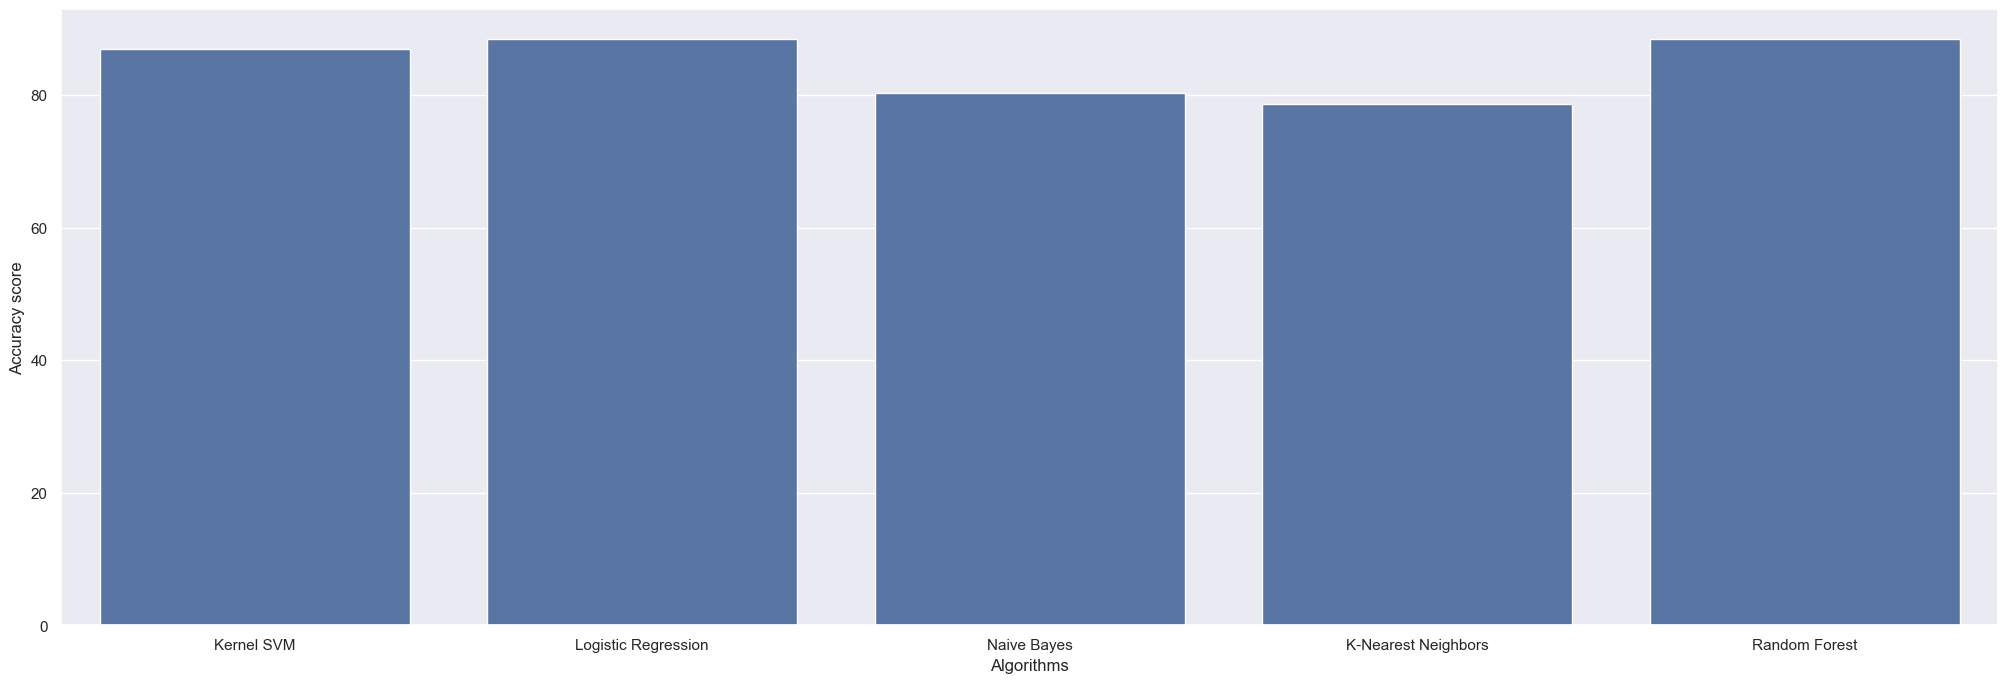

In [26]:
sns.set(rc={'figure.figsize':(25,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=model_results["ML Model"], y=model_results["Confusion Matrix Accuracy"])
plt.savefig("Accuracy Graph",format='svg', dpi=1200)


In [ ]:
# Take input from user
age = int(input("Enter age: "))
sex = int(input("Enter sex (0 for female, 1 for male): "))
cp = int(input("Enter chest pain type (0-3): "))
trestbps = int(input("Enter resting blood pressure: "))
chol = int(input("Enter serum cholesterol in mg/dl: "))
fbs = int(input("Enter fasting blood sugar > 120 mg/dl (1 for True, 0 for False): "))
restecg = int(input("Enter resting electrocardiographic results (0-2): "))
thalach = int(input("Enter maximum heart rate achieved: "))
exang = int(input("Enter exercise induced angina (1 for Yes, 0 for No): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
slope = int(input("Enter the slope of the peak exercise ST segment (0-2): "))
ca = int(input("Enter number of major vessels (0-3) colored by flourosopy: "))
thal = int(input("Enter thalassemia (0-3): "))

# Put the input into a numpy array
new_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

# Use the trained model to predict
prediction = svm_model.predict(new_data)

# Print the prediction
if prediction[0] == 1:
    print("The model predicts that the person has heart disease.")
else:
    print("The model predicts that the person does not have heart disease.")


In [28]:
#import joblib

# Assuming best_model is your trained model
#best_model = rf_model  # Replace with your best-performing model

# Save the model to a file
#joblib.dump(best_model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [20]:
import pickle
#filename = rf_model
filename = 'heart-disease-prediction-knn-model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

NameError: name 'rf_model' is not defined

In [22]:
pip install flask

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
